Code createx: 15/04/21

## Initial testing of networks and how they could be applied to the project

In [52]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random

In [ ]:
edgelist=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8)]
H=nx.Graph(edgelist)
nx.draw(H)

<function matplotlib.pyplot.show(close=None, block=None)>

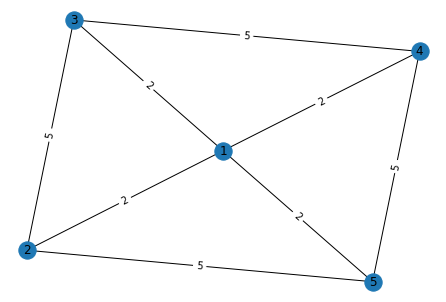

In [44]:
# creating a simple graph
edgelist=[(1,2),(1,3),(1,4),(1,5),(2,3),(3,4),(4,5),(2,5)]
G=nx.Graph(edgelist)


# give attributes to nodes and edges
G.nodes[1]['Number'] = 11
G.nodes[2]['Number'] = 12
G.nodes[3]['Number'] = 13
G.nodes[4]['Number'] = 14
G.nodes[5]['Number'] = 15

G.edges[1,2]['Time'] = 2
G.edges[1,3]['Time'] = 2
G.edges[1,4]['Time'] = 2
G.edges[1,5]['Time'] = 2

G.edges[2,3]['Time'] = 5
G.edges[3,4]['Time'] = 5
G.edges[4,5]['Time'] = 5
G.edges[5,2]['Time'] = 5


pos = nx.spring_layout(G)


#nx.draw(G, with_labels=True)
nx.draw(G,pos, with_labels=True)
node_labels = nx.get_node_attributes(G,'Time')
nx.draw_networkx_labels(G, pos, labels = node_labels)
edge_labels = nx.get_edge_attributes(G,'Time')
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.savefig('SimpleWeightedNetwork.png')
plt.show



## Create dataframe to track position of people within the network 
Initally 10 people, placed at random nodes. There will then be a probability that they move from node to node

In [58]:
number_of_people = 10
number_of_people_list = range(1,number_of_people+1,1)

node = []
for i in range(1,number_of_people+1,1):
    x = random.randint(1,5)
    node.append(x)

tracking = pd.DataFrame(data=number_of_people_list, columns=['Person'])
tracking['Node'] = node
tracking

,Person,Node
0,1,2
1,2,3
2,3,2
3,4,3
4,5,1
5,6,2
6,7,3
7,8,2
8,9,5
9,10,2


In [57]:
number_of_people_list

range(1, 11)

### Querying data

In [39]:
# Return list of nodes 
G.nodes()

NodeView((1, 2, 3, 4, 5))

In [40]:
# to see nodes and attributes - dictionary
G.nodes(data=True)

NodeDataView({1: {'Number': 12}, 2: {'Number': 15}, 3: {}, 4: {}, 5: {}})

In [41]:
# Retuns a list of tuples. Each tuple represents an edge
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 5), (3, 4), (4, 5)])

In [42]:
# Return edges and attributes - dictionary
G.edges(data=True)

EdgeDataView([(1, 2, {'Time': 8}), (1, 3, {}), (1, 4, {}), (1, 5, {}), (2, 3, {'Time': 5}), (2, 5, {}), (3, 4, {}), (4, 5, {})])

I think probably for what we want, undirected will be fine. 

### Degree centrality

This defines the importance of a node
= number of neighbours/number of neighbours i could possibly have  

Here, a super spreader would have a high degree of centrality

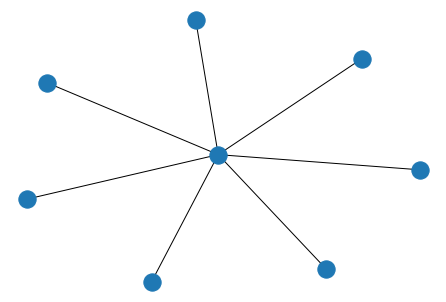

In [26]:
edgelist=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8)]
H=nx.Graph(edgelist)
nx.draw(H)

In [29]:
[n for n in H.neighbors(1)]

[2, 3, 4, 5, 6, 7, 8]

In [30]:
nx.degree_centrality(H)

{1: 1.0,
 2: 0.14285714285714285,
 3: 0.14285714285714285,
 4: 0.14285714285714285,
 5: 0.14285714285714285,
 6: 0.14285714285714285,
 7: 0.14285714285714285,
 8: 0.14285714285714285}